## 数据清洗

大家好，这一期我将为大家带来我的pandas学习心得第二期：数据清理。这一步非常重要，一般在获取数据源之后，我们紧接着就要开始这一步，以便为了之后的各种操作，简单来说，我们的目标就是让数据看起来赏心悦目，规规矩矩的，所以我们会对原始的dataframe做一些必要的美容，包括规范命名，去除异常值，重新选择合适的index啊，处理缺失值，统一列的命名等等。

这一期我会和大家分享一些比较好用常见的清洗方法。首先还是让我们来简单看一下本文将会用到的数据源:

 - property_data.csv 这是一个超小型的房地产行业的数据集，大家会在文章最后找到下载地址。

这篇文章我会从以下几个方面来和大家分享我的心得体会：
1. 有关缺失值的处理
2. 有关列的处理
3. 设置Index
3. 源码及数据下载地址
 


## 1.有关缺失值的处理

这里我们会用到 property_data.csv这个数据集，在开始处理缺失值之前，我们可以先话一分钟仔细想想，为什么实际生活中的数据从来是不完整的，原因基本有几个方面：
 - 用户忘记填写字段
 - 从旧数据库手动传输时数据丢失
 - 代码中有bug
 - 用户不填写非必须字段（比如注册的时候）
 
 因为这些原因，我每次在处理missing value的时候都会问自己两个基础问题：
 1. 数据集每一列有什么特点？
 2. 我们想要在处理后得到什么类型的数据（int，float，string，boolean）？

带着这些疑问，我们可以开始了，首先让我们简单读取一下数据，利用head函数看看前5行，如果你还对pandas的基础知识有疑问，可以看看我上一篇文章：[Pandas之旅（一): 让我们把基础知识一次撸完，申精干货](https://segmentfault.com/a/1190000018373808)

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir("F:\\Python教程\\segmentfault\\pandas_share\\Pandas之旅_02 数据清洗")

In [2]:
# Read csv file into a pandas dataframe
df = pd.read_csv("property_data.csv")

# Take a look at the first few rows
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


现在让我们看看数据的一些关键列是什么：
 - ST_NUM：街道号码
 - ST_NAME: 街道名称
 - OWN_OCCUPIED: 是否用于自住
 - NUM_BEDROOMS：卧室数量
 - SQ_FT：面积
 
这里可以给大家普及点房地产知识，有的时候房屋用途被明确规定，比如有的房产写的是"owner occupied only "）意思是说如果你买了，那这个房子会成为你的主要住所，不能用于出租之类的，简单理解就是自住
 
 
所以现在我可以自问自答第一个问题:数据集每一列有什么特点？

 - ST_NUM：float或int ...
 - ST_NAME：string
 - OWN_OCCUPIED：string ... Y（“是”）或N（“否”）
 - NUM_BEDROOMS：float或int，数字类型
 - SQ_FT：float或int，数字类型


### 1.1 规范的缺失值标记

现在让我们关注ST_NUM这一列：

In [3]:
# Looking at the ST_NUM column
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

如果想查看该列的缺失值情况，我们可以利用isnull（）方法，如果出现缺失值，会返回True，反之返回false

In [4]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

但是其实如果我们打开csv文件，你会发现第3行是空白，还有一行在该列显示的是NA，所以结论已经有了：在pandas里表示缺省值的符号及时NA,换句话说，如果我们要表示缺省值，标准写法是NA

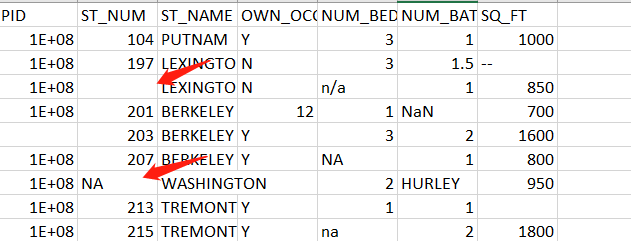

### 1.2 不规范的缺失值标记

同样的，这回让我们关注一下NUM_BEDROOMS这一列，我们发现出现了4种类型的表达缺省值的标记：
 - n/a
 - NA
 - —
 - na

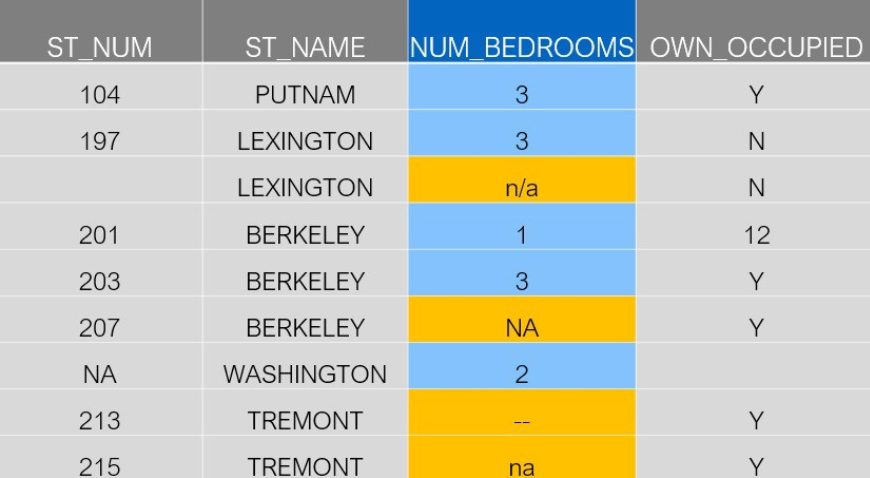

通过刚才的实践，我们已经确定NA是pandas可以识别的，那么其他的符号呢，现在让我们来测试一下

In [5]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7      1
8     na
Name: NUM_BEDROOMS, dtype: object

In [6]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

可以看到pandas识别了n/a 和NA两种符号，但是接下来我们要考虑一个问题，假设你是房地产公司的地区总经理，你每周会收到不同地区的负责人提交的表格，
这些人中有的喜欢用--表示空白值，有的人喜欢用na，那应该怎么办？

最简单的方式就是将所有表示空白值的符号统一放在list中，让后让pandas一次性识别:

In [7]:
# Making a list of missing value types
missing_values =  ["na", "--"]
df = pd.read_csv("property_data.csv", na_values = missing_values)

现在我们来看看到底发生了什么？


In [8]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


我们可以发现只要missing_value中记录的表达空白值的符号，全部变成了规整的NaN

### 1.3 类型不一致的异常值

刚刚我们已经简单了解了在pandas中如何处理缺失值的，还有一种情况，让我们来看OWN_OCCUPIED这一列，这一列的答案只能是Y,N 但是我们发现数据集意外地出现了12，属于类型不对称

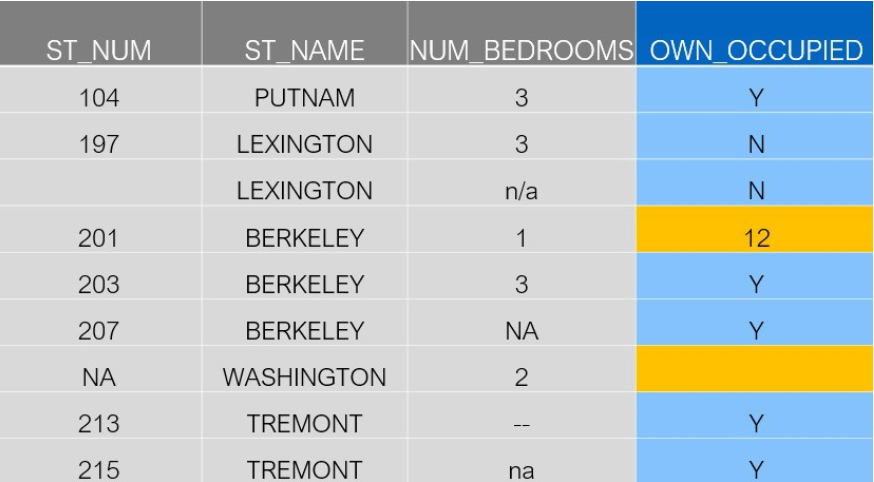

In [9]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [10]:
# Detecting numbers 
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

我们这里的策略是：
 - 循环遍历OWN_OCCUPIED列
 - 尝试将条目转换为整数
 - 如果条目可以更改为整数，请输入缺失值
 - 如果数字不能是整数，我们知道它是一个字符串，所以继续

这样我们会把OWN_OCCUPIED这一列中所有类型不对的值转化为NaN，现在来看结果：

In [11]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

### 1.4 汇总缺失值

pandas提供了更为简洁的方式，可以让我们整体了解所有column的空值：

In [12]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           2
dtype: int64

或者如果我们只想知道数据是否存在空值，那么可以使用以下的命令：

In [13]:
# Any missing values?
df.isnull().values.any()

True

### 1.5 替换缺失值

In [14]:
# Replace missing values with a number
df['ST_NUM'].fillna(125, inplace=True)

In [15]:
# Location based replacement
df.loc[2,'ST_NUM'] = 125

In [16]:
# Replace using median 
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0


## 2. 有关列的处理

### 2.1 统一修改列名

现在假设因为一些需求，需要我们统一修改列名，把列名改为小写，我们可以结合列表推导式轻易实现

In [17]:
df.rename(str.lower, axis='columns',inplace =True)
df.columns

Index(['pid', 'st_num', 'st_name', 'own_occupied', 'num_bedrooms', 'num_bath',
       'sq_ft'],
      dtype='object')

In [18]:
new_cols = [c.replace("_","-") for c in df.columns]
change_dict =dict(zip(df.columns,new_cols))
df.rename(columns=change_dict,inplace=True)
df

,pid,st-num,st-name,own-occupied,num-bedrooms,num-bath,sq-ft
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0


### 2.1 根据需求新增列

假如目前我们需要新增一列，根据房屋面积大小来赋值,我们先随意把缺失值补上：

In [19]:
df['sq-ft'].fillna('0.0')

0    1000
1     0.0
2     850
3     700
4    1600
5     800
6     950
7     0.0
8    1800
Name: sq-ft, dtype: object

In [20]:
df["rank"]= pd.cut(df['sq-ft'], [0, 800, 1600, np.inf], labels=("S","M","B"))
df

,pid,st-num,st-name,own-occupied,num-bedrooms,num-bath,sq-ft,rank
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0,M
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN,NaN
2,100003000.0,125.0,LEXINGTON,N,2.5,1,850.0,M
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0,S
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0,M
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0,S
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0,M
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN,NaN
8,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0,B


## 3. 设置Index

In [21]:
df["Fake_Index"]=["A00"+str(i) for i in range(len(df))]
df

,pid,st-num,st-name,own-occupied,num-bedrooms,num-bath,sq-ft,rank,Fake_Index
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0,M,A000
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN,NaN,A001
2,100003000.0,125.0,LEXINGTON,N,2.5,1,850.0,M,A002
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0,S,A003
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0,M,A004
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0,S,A005
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0,M,A006
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN,NaN,A007
8,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0,B,A008


In [22]:
df.Fake_Index.is_unique

True

In [23]:
df = df.set_index('Fake_Index')
df

,pid,st-num,st-name,own-occupied,num-bedrooms,num-bath,sq-ft,rank
Fake_Index,,,,,,,,
A000,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0,M
A001,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN,NaN
A002,100003000.0,125.0,LEXINGTON,N,2.5,1,850.0,M
A003,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0,S
A004,NaN,203.0,BERKELEY,Y,3.0,2,1600.0,M
A005,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0,S
A006,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0,M
A007,100008000.0,213.0,TREMONT,Y,1.0,1,NaN,NaN
A008,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0,B


In [24]:
#  根据索引名称切片
df['A000':'A003']

,pid,st-num,st-name,own-occupied,num-bedrooms,num-bath,sq-ft,rank
Fake_Index,,,,,,,,
A000,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0,M
A001,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN,NaN
A002,100003000.0,125.0,LEXINGTON,N,2.5,1,850.0,M
A003,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0,S


In [25]:
#  根据索引位置切片

df.iloc[1:3, 0:3]

,pid,st-num,st-name
Fake_Index,,,
A001,100002000.0,197.0,LEXINGTON
A002,100003000.0,125.0,LEXINGTON


In [26]:
# 定位到具体元素
df.iloc[1,2]

'LEXINGTON'

## 总结

我把这一期的ipynb文件和py文件放到了GIthub上，大家如果想要下载可以点击下面的链接：
 - Github仓库地址： [https://github.com/yaozeliang/pandas_share](https://github.com/yaozeliang/pandas_share)


这一期先讲到这里，希望大家能够继续支持我，完结，撒花